# Anexo III: Funções Python

In [88]:
import matplotlib.pyplot as plt
from scipy import stats    

massas = [260, 265, 270, 275, 280, 285, 290, 295, 300]
volumes = [154, 160, 164, 168, 174, 180, 185, 190, 195]

erro_massa = [0.1] * 9
erro_volume = [1] * 9

def graph_data(massas, volumes, erro_volume, erro_massa, upper_deviation, lower_deviation):
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(massas, volumes)

    expected = [slope*massa for massa in massas] + intercept

    # Upperbound e Lowerbound fiz no olhometro
    upperbound = [slope*massa + upper_deviation for massa in massas] + intercept
    lowerbound = [slope*massa - lower_deviation for massa in massas] + intercept

    plt.scatter(massas, volumes, color='blue', marker='.')
    plt.plot(massas, expected, color='red', label='Regression Line')
    plt.plot(massas, upperbound, color='black', label='Regression Line')
    plt.plot(massas, lowerbound, color='black', label='Regression Line')
    plt.errorbar(massas, volumes, erro_volume, erro_massa, linestyle='', color='black', capsize=2)    
    plt.xlabel('Massa (g)')
    plt.ylabel('Volume (mL)')
    plt.title('Volume de água em função da massa obtida na pesagem do empuxo')
    plt.show()

    max_slope = (upperbound[-1] - lowerbound[0]) / ((len(massas) - 1) * 5)
    min_slope = (lowerbound[-1] - upperbound[0]) / ((len(massas) - 1) * 5)

    erro_a = (max_slope - min_slope) / 2

    print("MAX: ", upperbound)
    print("MIN: ", lowerbound)
    print("Coeficiente angular: ",slope)
    print("Erro do Coeficiente angular: ", erro_a)

**Disciplina:** Física Experimental II 

**Professora:** Barbara Magnani

**Alunos[0]:** Rubens Kaiserman - 122119151

**Alunos[1]:** Gian Maule - 

# Relatório I - Empuxo e Densidade

## Parte I: Medidas
*Com os dados obtidos para a água, monte uma tabela contendo as grandezas M e V , bem como suas
respectivas incertezas. Preencha a coluna “barra” identificando a barra metálica (A para alumínio e
L para latão) e a forma da seção reta da mesma (C para circular e Q para quadrado). (1.0 pt)*

<hr>

- $ M_R = (107,5 \pm 0,1) g$
- $ M_0 = (252,9 \pm 0,1) g$
- $ V_0 = (1248 \pm 1) ml$

|   i   | $ (M_i \pm \delta M_i) $ (g) | $ (\frac{\delta M_i}{M_i}) $ | $ (V_i \pm \delta V_i) $ (ml) | $ (\frac{\delta V_i}{V_i}) $ | Barra |
|------|---------------------------|------------------------------|-------------------------|-----------------------------|-------|
|   1  | $260 \pm 0,1$            | 0,038%                       | $154 \pm 1$           | 0,65%                       |  LC   |
|   2  | $265 \pm 0,1$            | 0,038%                       | $160 \pm 1$           | 0,62%                       |  LC   |
|   3  | $270 \pm 0,1$            | 0,037%                       | $164 \pm 1$           | 0,60%                       |  LC   |
|   4  | $275 \pm 0,1$            | 0,036%                       | $168 \pm 1$           | 0,60%                       |  LC   |
|   5  | $280 \pm 0,1$            | 0,036%                       | $174 \pm 1$           | 0,57%                       |  LC   |
|   6  | $285 \pm 0,1$            | 0,035%                       | $180 \pm 1$           | 0,56%                       |  AQ   |
|   7  | $290 \pm 0,1$            | 0,034%                       | $185 \pm 1$           | 0,54%                       |  AQ   |
|   8  | $295 \pm 0,1$            | 0,034%                       | $190 \pm 1$           | 0,52%                       |  AQ   |
|   9  | $300 \pm 0,1$            | 0,033%                       | $195 \pm 1$           | 0,51%                       |  AQ   |



Observações:

A massa foi medida utilizando uma balança mecânica. Sua incerteza foi definida verificando a quantidade de gramas necessárias de alteração para que a balança perdesse o equilíbrio.

A medida do volume foi obtida observando o nível da água na proveta. Sua incerteza foi definida ao olhar para o menisco e observar que não era possível determinar se ela estava acima ou abaixo da marca com total certeza, assim deveria ser dado mais ou menos 1ml que é a metade da menor unidade de medida.

## II Análise dos Dados

#### *1. A partir dos dados da tabela, analise as incertezas relativas de M e de V . De uma forma geral, qual variável é mais precisa, M ou V ? A partir da sua resposta, qual gráfico deverá ser feito para determinar a densidade do líquido, M × V ou V × M ? Justifique.(1.0pt)* 

Definição do modelo:

Seja o Sistema formado pela barra pendurada por um fio, uma barra metálica e uma proveta preenchida por um fluido.

Nossa suposição é de que a variação da medida da massa do fluido depende de nada mais do que da densidade do fluido.

$$ 
    \rho = \frac{M_i - M_0}{V_i - V_0}
$$

Onde $M_i$ e $M_0 $ são massa final e inicial e $V_i$ e $V_0$ são volume final e inicial.

Onde as massas e os volumes foram medidos diretamente utilizando uma balança para a massa e uma proveta para o volume.

O anexo 1 desse relatório é um esquema do sistema estudado. Nesse esquema podemos representar as forças que atuam no sistema com a seguinte equações

$$
    T_0 = mg \rightarrow \text{   Não há contato entre o fluido e barra} \\
    N_0 = M_0g \rightarrow \text{   Não há contato entre o fluido e a barra } \\
    \\
    T_i + E + N_i - mg - M_0g - E = 0 \rightarrow \\ 
    
    \text{ Agora com a barra parcialmente submersa. Considera-se o sistema em equilibrio.}\\ \text{ Portanto a resultante das forças deve ser 0. Considera-se o sentido positivo as forças contra o sentido da gravidade e} \\ 
    
    \text{trabalha-se com o módulo dos vetores aceleração.} M_i \text{ é a massa medida pela balança. } N_i \text{ é a resposta da balança sobre a proveta. } 
    
    \text{Aqui considera-se E como a força que do fluido que empurra a barra para cima.:} \\


    \text{ Supõe-se } T_0 = T_i + E \\
    
    T_i + E + N_i - T_0 - M_0g - E = 0 \Rightarrow N_i - M_0g - E = 0.
    
    \space \\ \space \\
    

    \text{ Como } N_i \text{ é a força que contrabalanceia } M_i \text{. Seu módulo é igual, logo}. \\
    M_i = M_0 + E \Rightarrow E = (M_i - M_0)g

    \newline \newline 

    \text{Consideramos } \rho \text{ como a densidade de um fluido. Portanto} \\

    E = \rho (V_i - V_0) \rightarrow  \text{Onde } V_i \text{ é a medida do volume para } M_i \text{ e } V_0 \text{ é a medida do volume para } M_0 \newline \newline


    \text{Logo, nossa hipótese principal é que} \newline \newline

    \rho(Vi - V_0) = M_i - M_0
$$  

Portanto, a massa e o material da barra não interfeririam na variação da massa do sistema.

Agora, em posse dos dados da tabela e da relação matemática que descreve o sistema que estamos medindo. Podemos decidir qual o formato do gráfico que desejamos fazer. M x V ou V x M.

A fim de deixar nossos dados visualmente mais objetivos. Optamos por colocar no eixo Y o valor com maior erro atrelado, pois ele teria maior dispersão nos dados e uma barra de erro maior. Verificamos que A medida de volume possui um erro maior atrelado e portanto escrevemos um gráfico M x V.

Agora determinemos o erro da medida da densidade a partir da propagação da incerteza da massa e do volume.

$$ 
    \delta \rho = \sqrt{(\frac{\partial rho}{\partial \Delta M} \delta \Delta M)^2 + (\frac{\partial rho}{\partial \Delta V} \delta \Delta V)^2}
$$
Onde $\Delta M$ e $\Delta V$ são as variações de M e V.
$$
    \delta \rho = \sqrt{(\frac{1}{V} \delta \Delta M)^2 + (\frac{\Delta M}{\Delta V^2} \delta \Delta V)^2}
$$
$$
    \delta \rho = \rho\sqrt{(\frac{\delta \Delta M}{\Delta M} )^2 + (\frac{\delta \Delta V}{\Delta V})^2}
$$

Com base nisso conseguimos afirmar que a incerteza do volume e da massa tem o mesmo impacto em $\rho$. Contudo, sendo a incerteza do volume maior, ela é mais relevante para incerteza de rho.

#### *2. Considerando todos os dados na tabela, faça um gráfico em papel milimetrado, diferenciando o conjunto de dados de cada barra. (1.0 pt)*

Os três gráficos serão adicionados como papel milimetrado no Anexo II. A seguir está apresentada uma versão computacional dos gráficos.

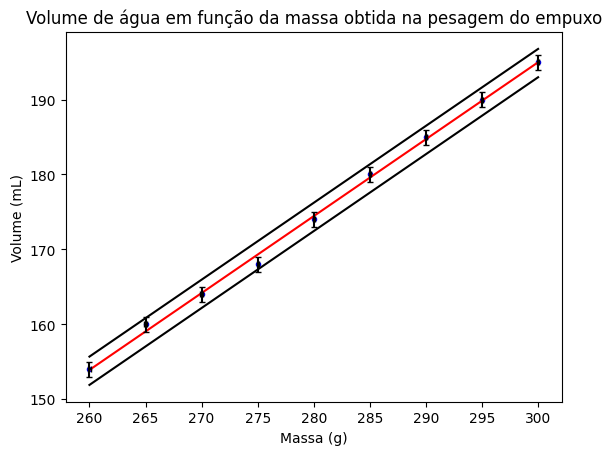

MAX:  [155.69111111 160.82444444 165.95777778 171.09111111 176.22444444
 181.35777778 186.49111111 191.62444444 196.75777778]
MIN:  [151.91111111 157.04444444 162.17777778 167.31111111 172.44444444
 177.57777778 182.71111111 187.84444444 192.97777778]
Coeficiente angular:  1.0266666666666668
Erro do Coeficiente angular:  0.09449999999999936


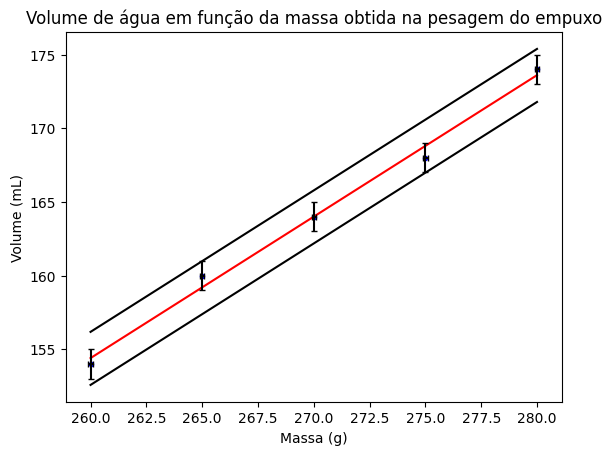

MAX:  [156.18 160.98 165.78 170.58 175.38]
MIN:  [152.58 157.38 162.18 166.98 171.78]
Coeficiente angular:  0.96
Erro do Coeficiente angular:  0.17999999999999905


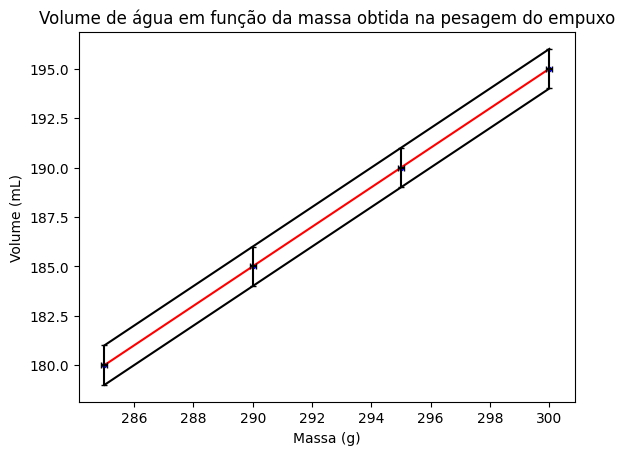

MAX:  [181. 186. 191. 196.]
MIN:  [179. 184. 189. 194.]
Coeficiente angular:  1.0
Erro do Coeficiente angular:  0.1333333333333333


In [89]:
massas = [260, 265, 270, 275, 280, 285, 290, 295, 300]
volumes = [154, 160, 164, 168, 174, 180, 185, 190, 195]

erro_massa = [0.1] * 9
erro_volume = [1] * 9

graph_data(massas, volumes, erro_volume, erro_massa, upper_deviation=1.78, lower_deviation=2)

# Achei que aqui o erro deveria ser menor do que na primeira metade. Talvez seja por causa do olhômetro

massas = [260, 265, 270, 275, 280]
volumes = [154, 160, 164, 168, 174]

erro_massa = [0.1] * 5
erro_volume = [1] * 5

graph_data(massas, volumes, erro_volume, erro_massa, upper_deviation=1.78, lower_deviation=1.82)

massas = [285, 290, 295, 300]
volumes = [180, 185, 190, 195]

erro_massa = [0.1] * len(massas)
erro_volume = [1] * len(volumes)

graph_data(massas, volumes, erro_volume, erro_massa, upper_deviation=1, lower_deviation=1)

#### *3. No gráfico anterior, para cada conjunto, determine o respectivo coeficiente angular da reta (y = ax + b) que melhor descreve os dados experimentais. Apresente nas tabelas abaixo os resultados para o coeficiente angular (a). (1.0 pt)*

Os valores estão descritos abaixo de seus respectivos gráficos.

#### Barra: LC
| a ml/g | $\delta{a}$ ml/g|
|----------|----------|
| 1,0 | 0,2 |


#### Barra: AQ
| a ml/g | $\delta{a}$ ml/g|
|----------|----------|
| 1,0 | 0,1 |

Os cálculos do método do paralelogramo estão explicitados no anexo II junto ao gráfico do papel milimetrado. Suas contas também estão visíveis no Anexo III dentro da função construída para a descrição do gráfico e cálculo do coeficiente linear.

#### *4. A partir dos resultados acima para cada barra, você pode concluir que a densidade do líquido apresenta alguma dependência com o tipo de barra? Justifique.(0,5 pt)*

O coeficiente linear que calculamos é $ a = \frac{\Delta V}{\Delta M} = \frac{1}{\rho}$

No experimento, utilizamos água. A densidade da água é 0.997 g/ml segundo as respostas rápidas do google. Portanto, $\frac{1}{\rho}$ o valor esperado para $\frac{1}{\rho}$ é 1,003 que está dentro do intervalo de erro de nossas medidas de $0,96 \pm 0,08$ e de $1,00 \pm 0,05$

Logo, nossa expectativa que a densidade da barra não interferisse com a medida parece concordar com os resultados. 
A concordância se torna maior ao observar que embora exista alteração do material e do formato da barra, a alteração do volume parece se comportar de maneira linear em função da variação da massa medida pois se comparados os resultados das duas barras, existe interseção entre os dois intervalos de erro atrelado.

### *5. Considerando agora o conjunto total de dados experimentais coletados, determine o coeficiente angular e linear, com suas respectivas incertezas, da reta (y = ax + b) que melhor se ajusta aos dados.(0,5 pt)*

#### Ajuste da reta

A melhor reta passa aproximadamente por cima do ponto (295, 190)
Obs: Isso seria constatado visualmente pelo papel milimetrado mas computacionalmente pode-se verificar que no gráfico acima a reta passa pelo ponto (295, 189.8). Aproximaremos para (295, 190). Da mesma maneira podemos dizer que a melhor reta passa aproximadamente sobre o ponto (260, 154)

$$ a = \frac{V}{M} $$
$$ a = \frac{190 - 154}{295 - 260} = 1,03 $$

Também pode ser calculado como a média entre as retas máximas e mínimas pelo método do paralelogramo

$$ a = (\frac{197 - 152}{40} + \frac{193-156}{40}) \cdot \frac{1}{2} = 1.03 $$

Os valores acima são os pontos máximos e mínimos das retas máximas e mínimas.
A inclinação da reta máxima é calculada pela diferença entre o maior ponto da reta mais alta e o menor ponto da reta mais baixa, dividido pelo trecho percorrido em M.
A reta mínima segue o mesmo príncipio mas fazendo a diferença entre o maior ponto da reta mínima e o menor ponto da reta máxima.
Obtidas as inclinações a média da soma das inclinações corresponde a reta ideal.

<br><br>

$$ a = 1,03 $$
$$ y = ax + b $$
$$ b = y - ax $$
$$ b = V - aM $$

<br><br>

$$ 190 - 1,03 \cdot 295 = b \rightarrow b = -113 $$

<br><br>

$$ a = \frac{\Delta V}{\Delta M} = \frac{1}{\rho} $$

<br><br>

$$ b = 190 - 1,03 \cdot 295 \Rightarrow b = -113,85 $$

Como traçamos a reta ideal com base nos valores de $ a_{max} $ e $ a_{min} $ o valor de b calculado usando o a esperado é o mesmo que calcular a média dos b's de com a inclinação máxima e a inclinação mínima.

<br><br>

$$ \delta b = \frac{b_{max} - b_{min}}{2} $$
$$ \delta b = \frac{|(197 - 300 \cdot 1,1) - (192 - 300 \cdot 0,9)|}{2} = 28 $$

<br><br>

$$ \delta a = \frac{a_{max} - a_{min}}{2} $$
$$ a = (\frac{197 - 152}{40} - \frac{193-156}{40}) \cdot \frac{1}{2} = 0,1 $$

<br><br>

| a ml/g            | b ml         |
| ----------------- | ------------ |
| $ 1,03 \pm 0,1 $ | $-114 \pm 28$ |


#### *7. A partir dos valores obtidos para os coeficientes linear e angular (papel milimetrado e qtiplot), calcule a densidade da água (ρa) e a massa do recipiente (Magua).(1.0 pt)*

e

#### *8.Utilize o espaço abaixo para detalhar os cálculos de propagação de incertezas utilizados para encontrar o valor da densidade e da massa do recipiente.(1.0 pt)*

$$ \delta \rho = sqrt{(\frac{\partial \frac{1}{a}}{\partial a}\delta a)^2}$$
$$ \delta \rho = sqrt{(\frac{1}{a^2}\delta a)^2} = 0,3 $$ 

$$ \rho = \frac{1}{a} \Rightarrow \rho = \frac{1}{1,03} = 0,971 \Rightarrow \rho = 1,0 \pm 0,3 $$

$$ V_0 = 148 \pm 1  $$ 
$$ \rho = 1 \pm 0,3  $$ 
$$ m = V_0 \cdot \rho = 148 \cdot 1 = 148 g  $$ 

$$
    \delta M_A = sqrt{(V_0 \cdot \delta \rho)^2 + (\rho \delta V_0)^2} = 5 * 10 g
$$

A massa do recipiente, portanto deverá ser $M_0 - M_A$

$$
    \delta M_R = \sqrt{(\frac{\partial }{\partial M_0}[M_0 - M_A]\delta M_0)^2 + (\frac{\partial }{\partial M_A}[M_0 - M_A]\delta M_A)^2} $$
$$    \delta M_R = \sqrt{(\delta M_0)^2 + (\delta M_A)^2} $$
  $$  \delta M_R = \sqrt{(0,1)^2 + (50)^2} = 50
$$

Faz sentido a incerteza do recipiente ser exatamente igual a incerteza da massa do fluido, afinal tudo que não for massa do recipiente é massa do fluido e tudo que não for massa do fluido é massa do recipiente. Se essa é uma relação que pode ser feita diretamente, não é possível afirmar com o que foi apresentado.

$$
    M_R = M_0 - M_A = 252,9 - 150 = (10 \pm 5) \cdot 10 g
$$


##### $\rho = 1,0 \pm 0,3 $
##### Massa de água no recipiente é $ (15 \pm 5) \cdot 10 g $ 
##### Massa do recipiente $(10 \pm 5) \cdot 10 g$



$ V_0 $ foi medida direta obtida na parte I.

#### _9. Considerando seus resultados e sabendo que a densidade da água é ρa = (0, 997 ± 0, 001) g/ml, qual dos valores é o mais preciso ? Qual dos seus resultados é o mais acurado? Há compatibilidade entre seu resultado e o valor tabelado? Justifique apresentando todos os cálculos.(1.0 pt)_

O valor tabelado é claramente mais preciso do que a densidade medida nesse experimento. Nesse experimento apresentamos uma incerteza da densidade 300 vezes maior do que a incerteza tabelada.

No experimento descrito nesse relatório, apresentamos três conjuntos de medidas. Dois conjuntos contendo barras de formatos e materiais diferentes e a união desses dois conjuntos como um terceiro conjunto.

Como esperado, o conjunto com maior quantidade de medidas apresenta um erro menor se comparado com os grupos isolados.

Contudo, todos os resultados apresentaram interseção com o valor esperado em seus intervalos de erro. Então estão todos de acordo com a hipótese inicial.

(0.9 < 0,997 < 1,1)

Seja, ER a discrepância entre o nosso resultado experimental e o valor tabelado.

$$
    ER = \frac{1 - 0,997}{0,997} = 0,3\%
$$

Que é uma discrepância considerávelmente pequena.

Portanto, o modelo descrito onde a variação na medida da massa depende apenas do volume de água deslocada está de acordo com o valor tabelado da água que foi nossa fonte das medidas.

Portanto, os resultados do experimentam validam o modelo. 

Dito isso, existem melhorias que podem ser feitas no experimento. O método de medida da incerteza da inclinação da reta para obter a inclinação da função que relaciona massa e volume pode ser melhorado. Utilizar técnicas computacionais para realizar o ajuste linear que determina a melhor reta melhoraria a precisão dos dados considerávelmente. Os métodos de medição poderiam também ser melhorados. O volume deveria ser medido com maior precisão a fim de garantir resultados mais confiáveis. Balanças mais precisas seriam úteis também, mas não prioridade. 